In [1]:
import pandas as pd
from scapy.all import rdpcap
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read PCAP file using Scapy
def readPCAP(pcapFile):
    packets = rdpcap(pcapFile)

    # packets[5].show()
    # Extract packet information
    packet_data = []
    for packet in packets:
        if 'IP' in packet:
            ip_layer = packet['IP']
            transport_layer = packet[ip_layer.payload.name]

            # Calculate payload size
            payload_size = len(packet) - len(ip_layer) - len(transport_layer)

            packet_info = {
                'Source IP': ip_layer.src,
                'Destination IP': ip_layer.dst,
                'Protocol': ip_layer.payload.name,
                'Source Port': transport_layer.sport if hasattr(transport_layer, 'sport') else None,
                'Destination Port': transport_layer.dport if hasattr(transport_layer, 'dport') else None,
                'Timestamp': packet.time,
                'Packet Size': len(packet),
                'Payload Size': payload_size
            }
            packet_data.append(packet_info)
            
    # Convert to Pandas DataFrame
    df = pd.DataFrame(packet_data)

    # Drop rows with NaN or None values
    df_cleaned = df.dropna()

    return df_cleaned

In [3]:
def plotIAT(df):
    # display(df['Interarrival'])

    # Plot the interarrival times
    plt.plot(df.index, df['Interarrival'], marker='o')
    plt.xlabel('Packet Number')
    plt.ylabel('Interarrival Time')
    plt.title('Interarrival Times of Packets')
    plt.grid(True)
    plt.show()

In [4]:
def plotTemporalPosition(df):
    # Visualize packets arrival over time
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Timestamp'], range(
        len(df)), label='Packets', color='blue')
    plt.xlabel('Timestamp')
    plt.ylabel('Packet Index')
    plt.title('Packets Arrival Over Time')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

### Datasets explored
1. Comparisons between usage types 
2. Comparisons between connection establishment 

In [5]:
# rdpData1 = "data/pcap/rdp-data/capture4.pcapng"
# rdpData2 = "data/pcap/rdp-data/capture5-use.pcapng"

rdpData1 = "data/pcap/rdp-data/capture5-use.pcapng"
rdpData2 = "data/pcap/rdp-data/capture6-use.pcapng"
rdpData3 = "data/pcap/rdp-data/capture2-nocredentials.pcapng"
rdpData4 = "data/pcap/rdp-data/capture3-credentials.pcapng"

df = readPCAP(rdpData1)

# Sort the dataframe by 'Timestamp' column
df.sort_values(by='Timestamp', inplace=True)

# Calculate interarrival times
df['Interarrival'] = df['Timestamp'].diff().fillna(0)
df['Interarrival-ms'] = df['Timestamp'].diff().fillna(0) * 1000

df

,Source IP,Destination IP,Protocol,Source Port,Destination Port,Timestamp,Packet Size,Payload Size,Interarrival,Interarrival-ms
0,192.168.2.2,192.168.2.3,TCP,59402,3389,1715740363.179901312,74,-26,0,0
1,192.168.2.3,192.168.2.2,TCP,3389,59402,1715740363.179942687,74,-26,0.000041375,0.041375000
2,192.168.2.2,192.168.2.3,TCP,59402,3389,1715740363.180209385,66,-18,0.000266698,0.266698000
3,192.168.2.2,192.168.2.3,TCP,59402,3389,1715740363.180920267,85,-37,0.000710882,0.710882000
4,192.168.2.3,192.168.2.2,TCP,3389,59402,1715740363.180925941,66,-18,0.000005674,0.005674000
...,...,...,...,...,...,...,...,...,...,...
1383,192.168.2.3,192.168.2.2,TCP,3389,59402,1715740375.813066509,66,-18,0.000025388,0.025388000
1384,192.168.2.3,192.168.2.2,TCP,3389,59402,1715740375.813247466,90,-42,0.000180957,0.180957000
1385,192.168.2.3,192.168.2.2,TCP,3389,59402,1715740375.813273342,66,-18,0.000025876,0.025876000
1386,192.168.2.2,192.168.2.3,TCP,59402,3389,1715740375.813551481,60,-12,0.000278139,0.278139000


In [6]:
df1 = readPCAP(rdpData2)

# Sort the dataframe by 'Timestamp' column
df1.sort_values(by='Timestamp', inplace=True)

# Calculate interarrival times
df1['Interarrival'] = df1['Timestamp'].diff().fillna(0)
df1['Interarrival-ms'] = df1['Timestamp'].diff().fillna(0) * 1000

df1

,Source IP,Destination IP,Protocol,Source Port,Destination Port,Timestamp,Packet Size,Payload Size,Interarrival,Interarrival-ms
0,192.168.2.2,192.168.2.3,TCP,52606,3389,1715827002.171893903,74,-26,0,0
1,192.168.2.3,192.168.2.2,TCP,3389,52606,1715827002.171914366,74,-26,0.000020463,0.020463000
2,192.168.2.2,192.168.2.3,TCP,52606,3389,1715827002.172334044,66,-18,0.000419678,0.419678000
3,192.168.2.2,192.168.2.3,TCP,52606,3389,1715827002.172334107,85,-37,6.3E-8,0.000063000
4,192.168.2.3,192.168.2.2,TCP,3389,52606,1715827002.172370812,66,-18,0.000036705,0.036705000
...,...,...,...,...,...,...,...,...,...,...
9937,192.168.2.2,192.168.2.3,TCP,52606,3389,1715827044.442596274,66,-18,0.000740318,0.740318000
9938,192.168.2.3,192.168.2.2,TCP,3389,52606,1715827044.45433765,90,-42,0.011741376,11.741376000
9939,192.168.2.3,192.168.2.2,TCP,3389,52606,1715827044.454447299,66,-18,0.000109649,0.109649000
9940,192.168.2.2,192.168.2.3,TCP,52606,3389,1715827044.455444643,60,-12,0.000997344,0.997344000


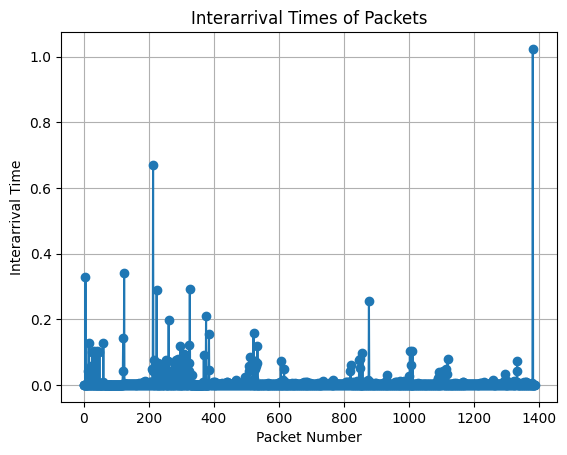

In [7]:
# 117 and 118
# 190 and 191

plotIAT(df)

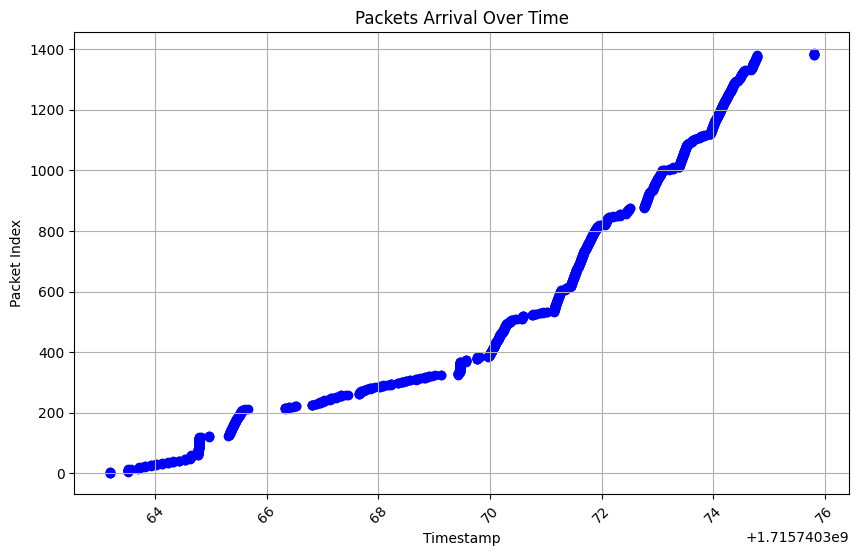

In [8]:
plotTemporalPosition(df)

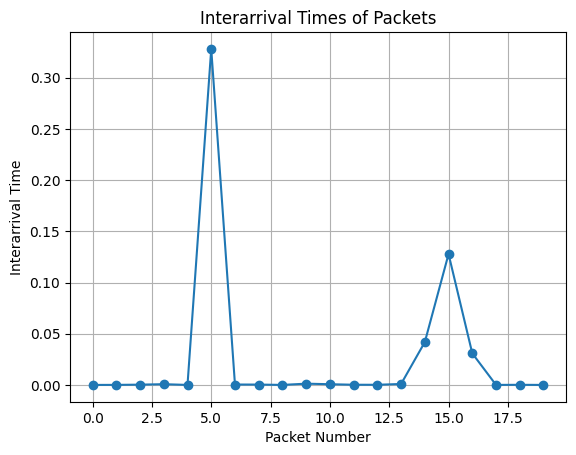

In [9]:
sliced_df = df.iloc[0:20]

plotIAT(sliced_df)

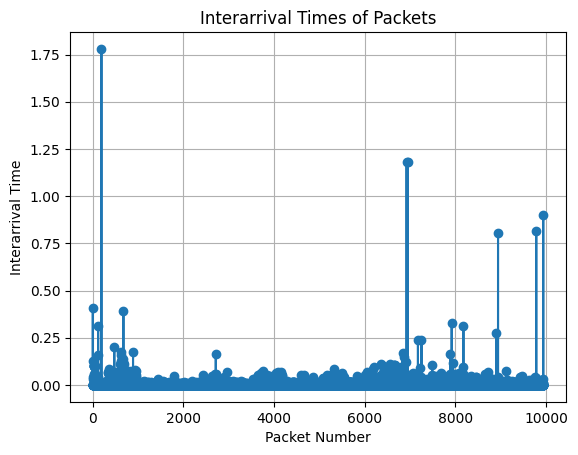

In [10]:
plotIAT(df1)

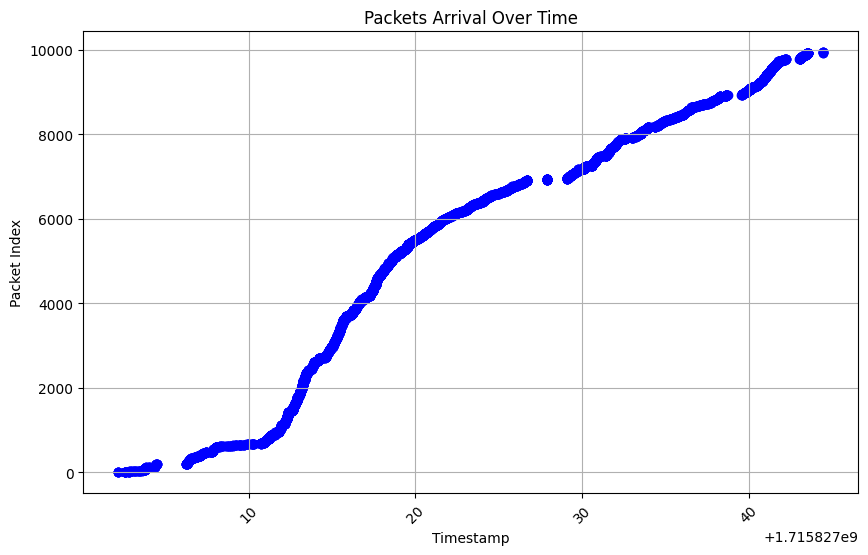

In [11]:
plotTemporalPosition(df1)

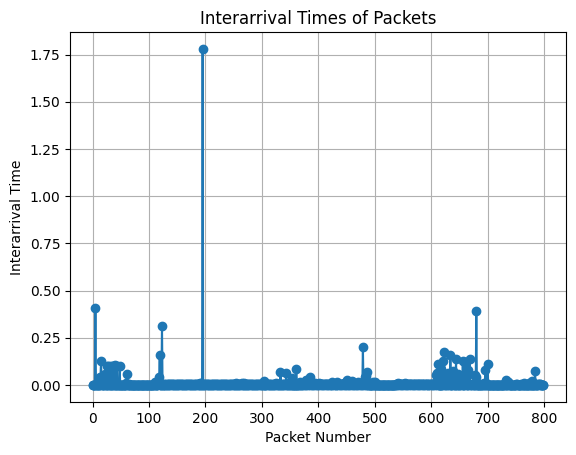

In [12]:
sliced_df1 = df1.iloc[0:800]
# 140:240

plotIAT(sliced_df1)

99th percentile:  0.05771339734000010474846931174


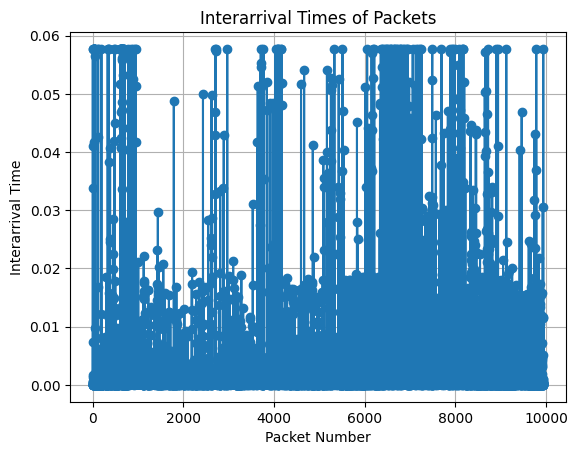

In [13]:
# Performing saturation to the 99th percentile
percentile_99 = df1["Interarrival"].quantile(0.99)
print("99th percentile: ", percentile_99)

df1['Interarrival'] = df1['Interarrival'].apply(
    lambda x: min(x, percentile_99))

# display(df1)
plotIAT(df1)

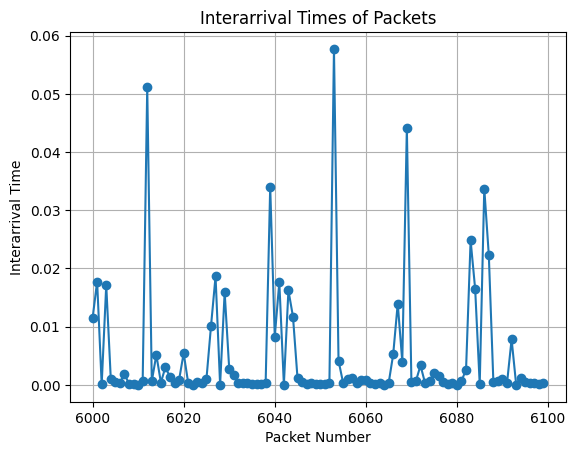

In [14]:
sliced_df1 = df1.iloc[6000:6100]
# 140:240

plotIAT(sliced_df1)

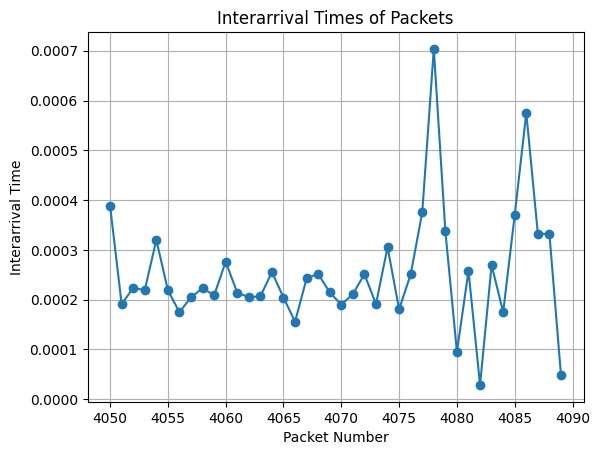

In [15]:
sliced_df1 = df1.iloc[4050:4090]
# 140:240

plotIAT(sliced_df1)

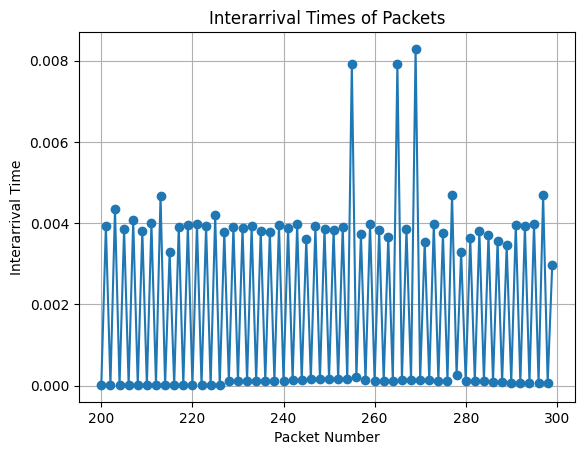

In [16]:
sliced_df1 = df1.iloc[200:300]
# 140:240

plotIAT(sliced_df1)

In [17]:
df2 = readPCAP(rdpData3)

# Sort the dataframe by 'Timestamp' column
df2.sort_values(by='Timestamp', inplace=True)

# Calculate interarrival times
df2['Interarrival'] = df2['Timestamp'].diff().fillna(0)
df2['Interarrival-ms'] = df2['Timestamp'].diff().fillna(0) * 1000

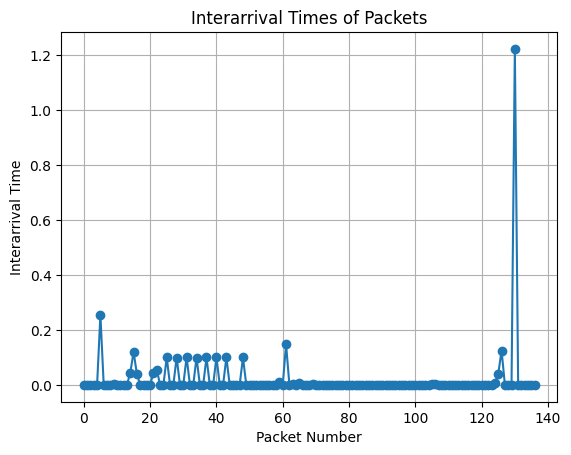

In [18]:
plotIAT(df2)

99th percentile:  0.2158683965599985446978053005


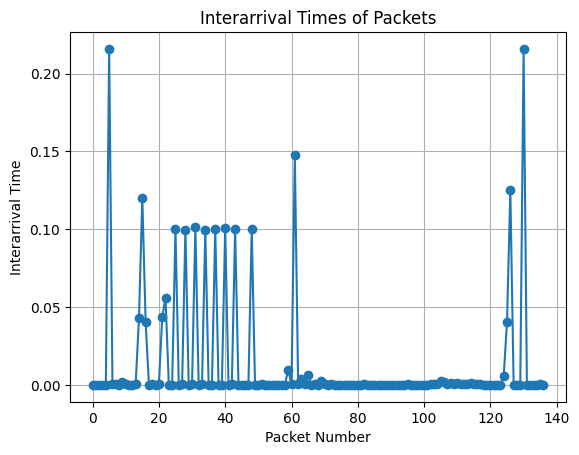

In [19]:
# Performing saturation to the 99th percentile
percentile_99 = df2["Interarrival"].quantile(0.99)
print("99th percentile: ", percentile_99)

df2['Interarrival'] = df2['Interarrival'].apply(
    lambda x: min(x, percentile_99))

# display(df2)
plotIAT(df2)

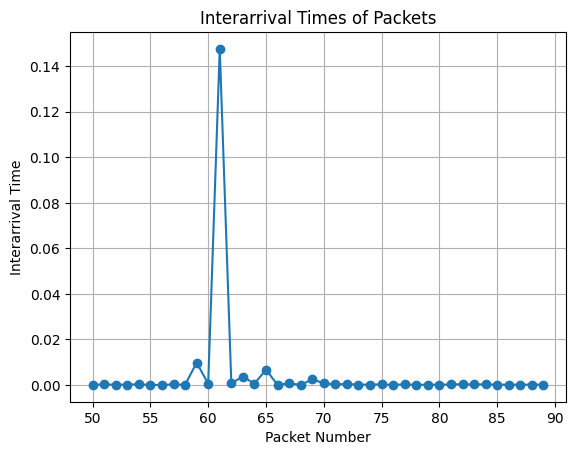

In [20]:
# 0:40
sliced_df2 = df2.iloc[50:90]
# 140:240

plotIAT(sliced_df2)

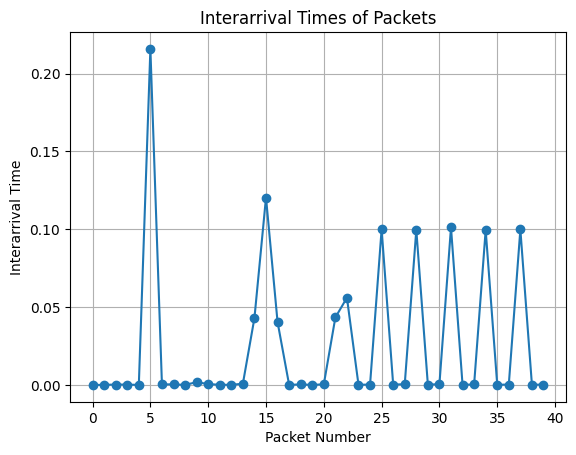

In [21]:
sliced_df2 = df2.iloc[0:40]

plotIAT(sliced_df2)

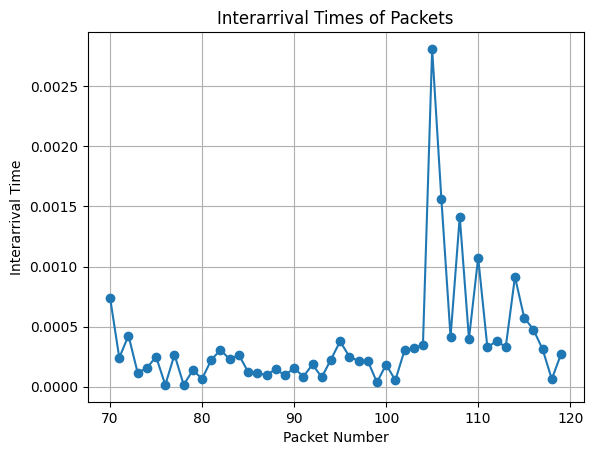

In [22]:
sliced_df2 = df2.iloc[70:120]
# 140:240

plotIAT(sliced_df2)

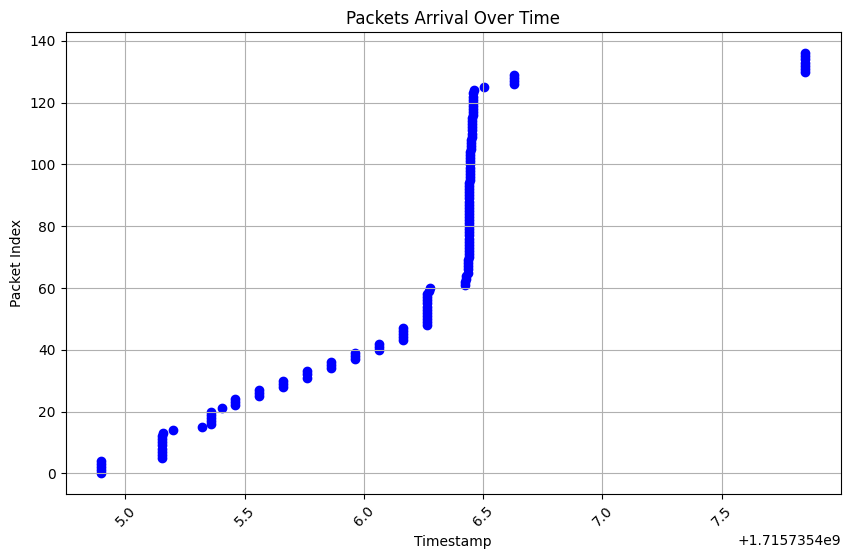

In [23]:
plotTemporalPosition(df2)

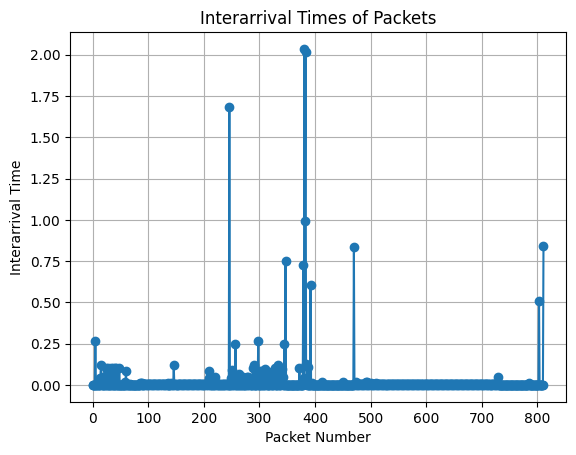

In [25]:
df3 = readPCAP(rdpData4)

# Sort the dataframe by 'Timestamp' column
df3.sort_values(by='Timestamp', inplace=True)

# Calculate interarrival times
df3['Interarrival'] = df3['Timestamp'].diff().fillna(0)
df3['Interarrival-ms'] = df3['Timestamp'].diff().fillna(0) * 1000

plotIAT(df3)

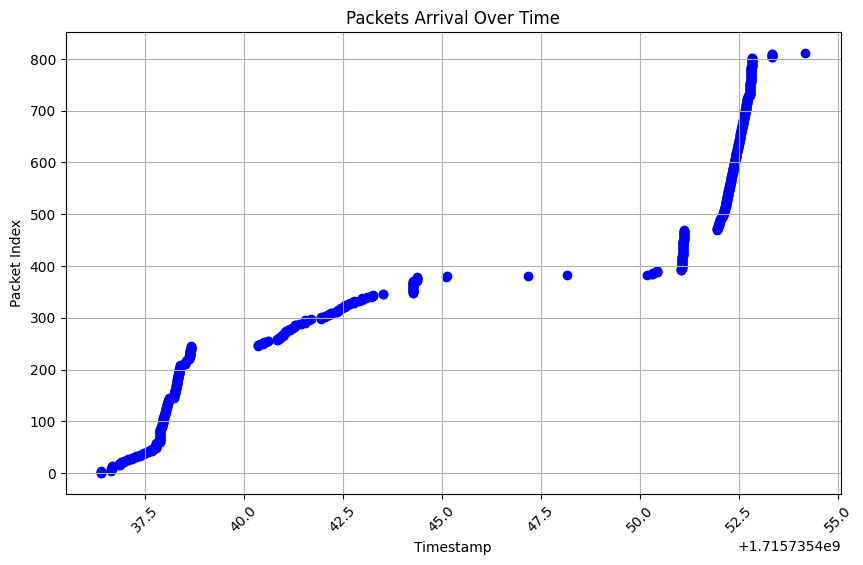

In [26]:
plotTemporalPosition(df3)

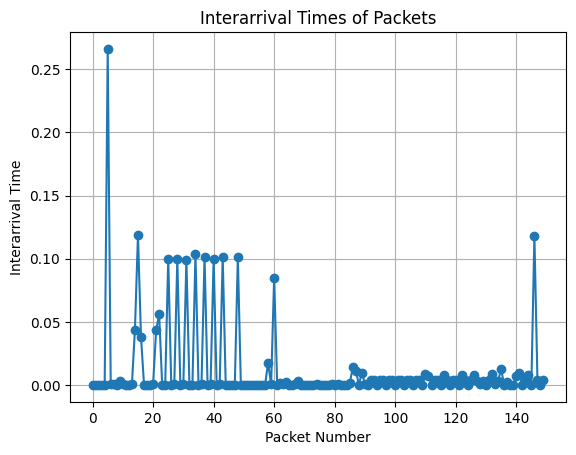

In [28]:
sliced_df3 = df3.iloc[0:150]
# 140:240

plotIAT(sliced_df3)

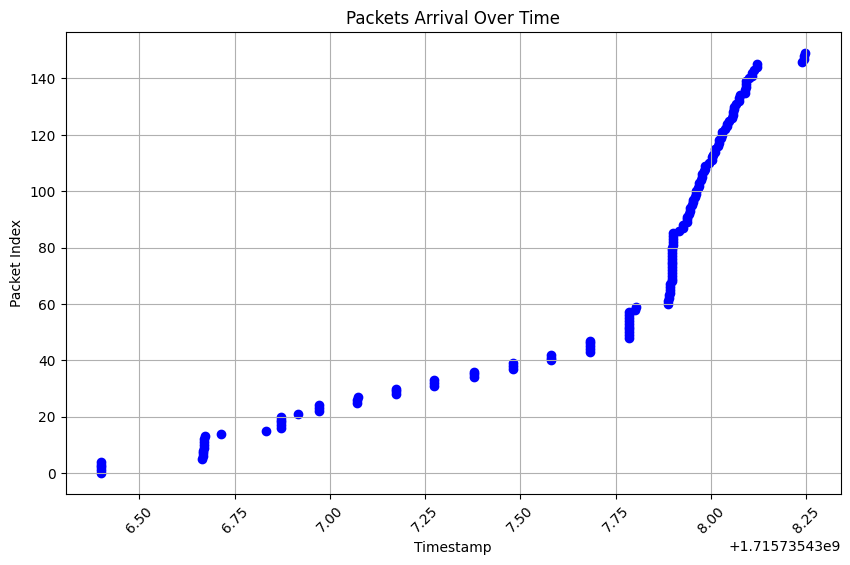

In [29]:
plotTemporalPosition(sliced_df3)